In [ ]:
# Setup setting terkait dengan plotting
import pandas as pd
import numpy as np                 # import numpy (mathematical operation)
import matplotlib.pyplot as plt    # import package untuk plotting
import scipy.optimize as opt       # import scipy untuk optimisasi weight
import seaborn as sn               # import seaborn untuk plotting

In [ ]:
#import dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/serensitio/asesmenclo23/main/dataset.csv')
dataset

,x,Y,LABEL
0,1.0000,399.6550,1.0
1,5.8293,428.5600,1.0
2,10.6585,266.0618,1.0
3,15.4878,376.9293,1.0
4,20.3171,383.6759,1.0
5,25.1463,463.8939,1.0
6,29.9756,502.8094,1.0
7,34.8049,536.4060,1.0
8,39.6341,412.8075,1.0
9,44.4634,553.9108,1.0


In [ ]:
# Ubah target nilai kelas menjadi biner 0 dan 1
dataset.replace([1,2], [0,1], inplace=True)

In [ ]:
dataset

,x,Y,LABEL
0,0.0000,399.6550,0.0
1,5.8293,428.5600,0.0
2,10.6585,266.0618,0.0
3,15.4878,376.9293,0.0
4,20.3171,383.6759,0.0
5,25.1463,463.8939,0.0
6,29.9756,502.8094,0.0
7,34.8049,536.4060,0.0
8,39.6341,412.8075,0.0
9,44.4634,553.9108,0.0


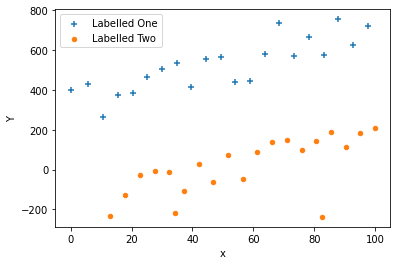

In [ ]:
# X = nilai fitur, semua kolom kecuali kolom terakhir
X = dataset.iloc[:, :-1]

# y = nilai target, kolom terakhir dari dataset
y = dataset.iloc[:, 2]

# data yang diberi label 1
labelledone = dataset.loc[y == 0]

# data yang diberi label 2
labelledtwo = dataset.loc[y == 1]

# plots
plt.scatter(labelledone.iloc[:, 0], labelledone.iloc[:, 1], s=30, marker='+', label='Labelled One')
plt.scatter(labelledtwo.iloc[:, 0], labelledtwo.iloc[:, 1], s=20, marker='o', label='Labelled Two')
plt.xlabel('x')
plt.ylabel('Y')
plt.legend()
plt.show()

# **Linear**

**Qualitatif**

In [ ]:
# Sigmoid Function
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
# Cost Function
def costFunction(theta, X, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(X @ theta)))
        + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
    return J

In [ ]:
# Gradient Function
def gradient(theta, X, y):
    return ((1/m) * X.T @ (sigmoid(X @ theta) - y))

In [ ]:
X.shape

(42, 2)

In [ ]:
(m, n) = X.shape
X = np.hstack((np.ones((m,1)), X))
y = y[:, np.newaxis]
theta = np.zeros((n+1,1)) # intializing theta with all zeros
J = costFunction(theta, X, y)
print(J)

0.6931471805599452


<ipython-input-121-d7615796b441>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [ ]:
# Optimisasi parameter dengan fmin_tnc dari library scipy

temp = opt.fmin_tnc(func = costFunction,
                    x0 = theta.flatten(),fprime = gradient,
                    args = (X, y.flatten()))
# Kolom pertama pada tuple output menunjukkan hasil theta yang dioptimalkan
theta_optimized = temp[0]
print(theta_optimized)

[ 0.12189149  0.26834704 -0.06084728]


<ipython-input-118-276fa6c09b0c>:4: RuntimeWarning: divide by zero encountered in log
  + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))
<ipython-input-118-276fa6c09b0c>:4: RuntimeWarning: invalid value encountered in multiply
  + np.multiply((1-y), np.log(1 - sigmoid(X @ theta))))


In [ ]:
# Hitung Cost Function dengan theta yang dioptimalkan
J = costFunction(theta_optimized[:,np.newaxis], X, y)
print(J)

2.5235637651400175e-05


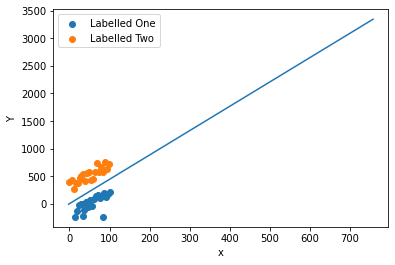

In [ ]:
# Plotting
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_optimized[2]*(theta_optimized[0]
          + np.dot(theta_optimized[1],plot_x))
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('x')
plt.ylabel('Y')
plt.legend((adm, not_adm), ('Labelled One', 'Labelled Two'))
plt.show()

**Akurasi Model**

In [ ]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_optimized, 0.5)

100.0


**Quantitatif**

In [ ]:
dataset

,x,Y,LABEL
0,0.0000,399.6550,0.0
1,5.8293,428.5600,0.0
2,10.6585,266.0618,0.0
3,15.4878,376.9293,0.0
4,20.3171,383.6759,0.0
5,25.1463,463.8939,0.0
6,29.9756,502.8094,0.0
7,34.8049,536.4060,0.0
8,39.6341,412.8075,0.0
9,44.4634,553.9108,0.0


In [ ]:
# X = nilai fitur, semua kolom kecuali kolom terakhir
X = dataset.iloc[:, :-1]

# y = nilai target, kolom terakhir dari dataset
y = dataset.iloc[:, 2]

In [ ]:
# Untuk validasi, split data menjadi data training dan data testing
# menggunakan sklearn package
from sklearn.model_selection import train_test_split

# data train = 80% dan data test = 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Bangun model dengan menggunakan library SCIKIT-LEARN: LogisticRegression
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression()                               # initialization
sk_model.fit(X_train, y_train)      # training the model
sk_preds = sk_model.predict(X_test) # testing process, input: testing data

sk_model.intercept_, sk_model.coef_     # show the output: b0 and b1 from the prediction

(array([15.86868326]), array([[ 0.10187707, -0.08883444]]))

In [ ]:
# Validasi hasil prediksi dengan data dengan menggunakan RMSE
from sklearn.metrics import mean_squared_error  # import rmse dari sklearn
rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
rmse(y_test, sk_preds)

0.0

# **SVM**

**Quantitatif**

In [ ]:
# Untuk plot source data
# one = variabel x
one = dataset.iloc[:, 0]

# two = variabel y
two = dataset.iloc[:, 1]

In [ ]:
#Import svm model
from sklearn import svm
#Buat svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train model menggunakan training sets
clf.fit(X_train, y_train)
#Predisi hasil untuk test dataset
y_pred = clf.predict(X_test)

In [ ]:
y_test

25    1.0
13    0.0
8     0.0
26    1.0
4     0.0
39    1.0
19    0.0
29    1.0
30    1.0
Name: LABEL, dtype: float64

In [ ]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 1., 1.])

In [ ]:
# Hitung akurasi melalui RMSE untuk hasil dari SVC - SCIKIT-LEARN:
rmse_svc = rmse(y_test, y_pred)
rmse_svc

0.0

**Qualitatif**

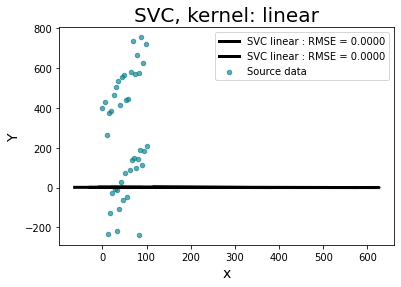

In [ ]:
# PLOTTING
plt.scatter(one, two, s=20, c='#087E8B', alpha=0.65, label='Source data')   # plot scatter
plt.plot(X_test, y_pred, color='#000000', lw=3, label=f'SVC linear : RMSE = {rmse_svc:.4f}')
plt.title('SVC, kernel: linear', size=20)
plt.xlabel('x', size=14)
plt.ylabel('Y', size=14)
plt.legend()                 # menunjukkan label
plt.show()

**Confusion Matrix**

Text(42.0, 0.5, 'Aktual')

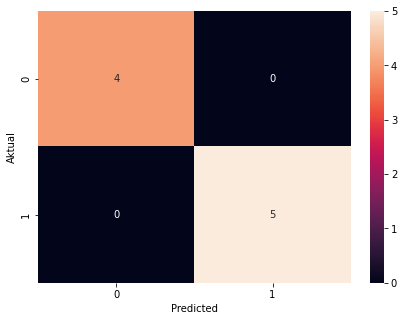

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#Plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Aktual')

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

